--------------------------------------------------------------------------------------------------------------------------------

<font, size = 6> Uber - Data scientist Interview - Challenge </font>

----------------------------------------------------------------------------------------------------------------------------

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Objective of the analysis:

The main objective of the analysis is to understand the data through data exploration and apply machine learning techniques to develop a predictive model. From the knowledge gained through data exploration and modeling, answer the questions below.

1. Which driver signups are most likely to start driving 
2. What factors are best at predicting whether a signup will result in driving and offer insights

Dataset provided contains driver's the following background information

<b> Data description: </b>

id: driver_id

city_id : city_id this user signed up in

signup_os : signup device of the user (“android”, “ios”, “website”, “other”)

signup_channel : what channel did the driver sign up from (“offline”, “paid”, “organic”, “referral”)

signup_timestamp : timestamp of account creation; local time in the form ‘YYYYMMDD’

bgc_date : date of background check consent; in the form ‘YYYYMMDD’

vehicle_added_date : date when driver’s vehicle information was uploaded; in the form ‘YYYYMMDD’

first_trip_date : date of the first trip as a driver; in the form ‘YYYYMMDD’

vehicle_make: make of vehicle uploaded (i.e. Honda, Ford, Kia)

vehicle_model: model of vehicle uploaded (i.e. Accord, Prius, 350z)

vehicle_year: year that the car was made; in the form ‘YYYY’

In [7]:
% matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Loading the dataset as a Pandas Dataframe:
data = pd.read_csv("./data/ds_challenge.csv")
data.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN


# Data Mining:

## Data Exploration-1:

In [35]:
# Printing the parameters in the dataset
data.columns.values

array(['id', 'city_name', 'signup_os', 'signup_channel', 'signup_date',
       'bgc_date', 'vehicle_added_date', 'vehicle_make', 'vehicle_model',
       'vehicle_year', 'first_completed_date'], dtype=object)

In [36]:
# Data count for each parameters:
data.count()

id                      54681
city_name               54681
signup_os               47824
signup_channel          54681
signup_date             54681
bgc_date                32896
vehicle_added_date      13134
vehicle_make            13223
vehicle_model           13223
vehicle_year            13223
first_completed_date     6137
dtype: int64

In [9]:
# Data count in percentage for each parameters:
data_percent = data.count() / len(data)
print(data_percent)

id                      1.000000
city_name               1.000000
signup_os               0.874600
signup_channel          1.000000
signup_date             1.000000
bgc_date                0.601598
vehicle_added_date      0.240193
vehicle_make            0.241821
vehicle_model           0.241821
vehicle_year            0.241821
first_completed_date    0.112233
dtype: float64


The parameters with lot of missing values may not contain useful information for modeling and they can be removed. Let us assume a cutoff of 60% and drop the parameters with value count less than that.

## Parameter Selection - 1:

In [10]:
data_percent[data_percent > 0.6]

id                1.000000
city_name         1.000000
signup_os         0.874600
signup_channel    1.000000
signup_date       1.000000
bgc_date          0.601598
dtype: float64

In [11]:
valid_parameters = data_percent[data_percent > 0.6].index.values

valid_parameters = np.append( valid_parameters, 'first_completed_date') 
# When 'first_completed_date' is a valid date then the corresponding driver has started driving after signup (11.22%)

print(valid_parameters)

['id' 'city_name' 'signup_os' 'signup_channel' 'signup_date' 'bgc_date'
 'first_completed_date']


In [47]:
# Retain only valid_parameters in the dataframe:
data = data[valid_parameters]
data.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN
1,2,Strark,windows,Paid,1/21/16,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16
4,5,Strark,android web,Referral,1/10/16,1/25/16,NaN


## Data cleaning-1 (Data Exploration-2):

<b> Is 'id' a unique variable ? </b>

In [22]:
id_unique_count = len(data['id'].unique())
print("id_unique_count: %d" %id_unique_count)
print("Length of the dataframe: %d" %len(data))

id_unique_count: 54681
Length of the dataframe: 54681


Yes, 'id' is a unique value for each user as expected and can be assigned as the index of the dataframe

In [48]:
# Assigning index and converting dates in string format to datetime format
data = data.set_index("id", drop = True)
data['signup_date'] = pd.to_datetime(data['signup_date'])
data['bgc_date'] = pd.to_datetime(data['bgc_date'])
data['first_completed_date'] = pd.to_datetime(data['first_completed_date'])

In [49]:
data.head()

,city_name,signup_os,signup_channel,signup_date,bgc_date,first_completed_date
id,,,,,,
1,Strark,ios web,Paid,2016-01-02,NaT,NaT
2,Strark,windows,Paid,2016-01-21,NaT,NaT
3,Wrouver,windows,Organic,2016-01-11,2016-01-11,NaT
4,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03
5,Strark,android web,Referral,2016-01-10,2016-01-25,NaT


We know that the signup_os and the bgc_date parameters have missing values that needs to be replaced. Lets explore the valid values for the signup_os and the bgc_date and fill the NaNs using a suitable method.

### Clean signup_os:

#### Frequency matrix:

Let us consider only categorical variables for grouping and find the frequency (or count) of each group

In [50]:
df_group1 = data.groupby(['signup_channel', 'city_name', 'signup_os'])['signup_date'].count()
df_group1 = df_group1.reset_index()
df_group1.columns = ['signup_channel', 'city_name', 'signup_os', 'Count']
df_group1.head()

,signup_channel,city_name,signup_os,Count
0,Organic,Berton,android web,1052
1,Organic,Berton,ios web,1427
2,Organic,Berton,mac,699
3,Organic,Berton,other,374
4,Organic,Berton,windows,697


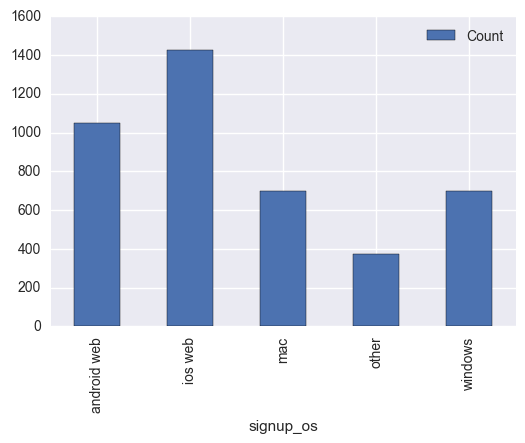

In [10]:
df_group1.ix[ (df_group1['signup_channel'] == 'Organic') & (df_group1['city_name'] == 'Berton')].plot.bar( x = 'signup_os', 
                                                                                                           y = 'Count', 
                                                                                                           figsize = (6, 4) )

From the above plot, it is obvious that when the 'signup_channel' is Organic and 'city_name' is berton then the partner is more likely to have signedup from ios web than anyother os. The next option would be android web. 

Although, the likelihood for signing up from ios web is higher than any other options, we cannot ignore them and replace NaNs with ios web. The probability of signing up from other options are not negligible. Hence, we need to follow a different approach than repalcing NaNs with mode.

Let's look at another case:

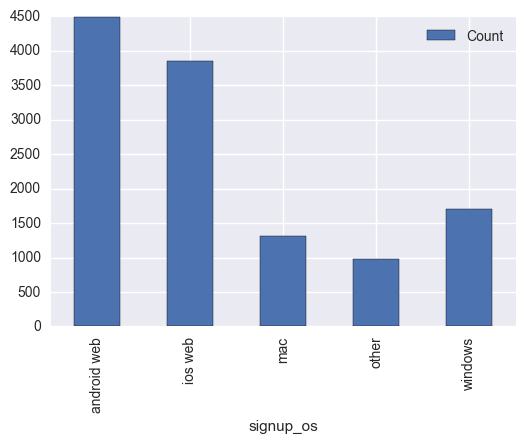

In [81]:
df_group1.ix[ (df_group1['signup_channel'] == 'Paid') & (df_group1['city_name'] == 'Strark')].plot.bar( x = 'signup_os', 
                                                                                                        y = 'Count', 
                                                                                                        figsize = (6, 4) )

We observe the same trend as the previous case. 

In such cases, the best two methods to replace missing values are:
    1. Assign weight to each of the categories based on the count and pick randomly
    2. Develop a simple model with 'signup_os' as the target variable with 'signup_channel' and 'city_name' as the predictors

As the percentage of NaNs is around 15%, it is sufficient to use probabilitic method to replace missing values.

Let us add probability for each group in the frequency table:

Probability of different signup_os types for a signup_channel and a city_name

In [51]:
df_group1_freq = data.groupby(['signup_channel', 'city_name'])['signup_os'].count()
df_group1_freq = df_group1_freq.reset_index()
df_group1_freq.columns = ['signup_channel', 'city_name', 'Total']
df_group1_freq.head()

,signup_channel,city_name,Total
0,Organic,Berton,4249
1,Organic,Strark,5668
2,Organic,Wrouver,978
3,Paid,Berton,8708
4,Paid,Strark,12350


In [53]:
df = pd.merge(df_group1, df_group1_freq, how = 'outer', on=['signup_channel', 'city_name'])
df.head(10)

,signup_channel,city_name,signup_os,Count,Total
0,Organic,Berton,android web,1052,4249
1,Organic,Berton,ios web,1427,4249
2,Organic,Berton,mac,699,4249
3,Organic,Berton,other,374,4249
4,Organic,Berton,windows,697,4249
5,Organic,Strark,android web,1529,5668
6,Organic,Strark,ios web,1814,5668
7,Organic,Strark,mac,929,5668
8,Organic,Strark,other,430,5668
9,Organic,Strark,windows,966,5668


In [55]:
df['prob'] = df['Count'] / df['Total']
df.head()

,signup_channel,city_name,signup_os,Count,Total,prob
0,Organic,Berton,android web,1052,4249,0.247588
1,Organic,Berton,ios web,1427,4249,0.335844
2,Organic,Berton,mac,699,4249,0.164509
3,Organic,Berton,other,374,4249,0.088021
4,Organic,Berton,windows,697,4249,0.164039


We have the probability calculated for each os in a group and we are ready to replace NaNs in 'signup_os' column

Creating a Dataframe with group names and corresponding probabilities in the form of a dictionary to make the replacement process easy.

In [56]:
df_group1_prob_dict = df.groupby(['signup_channel', 'city_name']).apply(lambda x: { x1:y1 for x1, y1 in x[['signup_os', 'prob']].values}).reset_index()
df_group1_prob_dict.columns = ['signup_channel', 'city_name', 'prob_dict']
df_group1_prob_dict

,signup_channel,city_name,prob_dict
0,Organic,Berton,"{'windows': 0.16403859731701576, 'mac': 0.1645..."
1,Organic,Strark,"{'windows': 0.17043048694424842, 'mac': 0.1639..."
2,Organic,Wrouver,"{'windows': 0.20245398773006135, 'mac': 0.1717..."
3,Paid,Berton,"{'windows': 0.1619200734956362, 'mac': 0.11862..."
4,Paid,Strark,"{'windows': 0.1382995951417004, 'mac': 0.10615..."
5,Paid,Wrouver,"{'windows': 0.17680950666186532, 'mac': 0.0975..."
6,Referral,Berton,"{'windows': 0.09788308409399883, 'mac': 0.1118..."
7,Referral,Strark,"{'windows': 0.09795570698466781, 'mac': 0.1061..."
8,Referral,Wrouver,"{'windows': 0.12430632630410655, 'mac': 0.0987..."


Creating a new copy of the dataframe to not directly apply the changes to the original dataframe so that we can start from here again when we mess any of the following steps. Like a checkpoint.

In [57]:
dat = data.copy()

In [59]:
for index_, x in df_group1_prob_dict[['signup_channel', 'city_name', 'prob_dict']].iterrows():
    
    df_temp = dat.ix[(dat['signup_channel'] == x[0]) & (dat['city_name'] == x[1]) & dat['signup_os'].isnull(), 'signup_os']
    
    keys, values = zip(*x['prob_dict'].items())
    
    values_ = np.random.choice(keys, p = values, size = len(df_temp))
    
    dat.ix[(dat['signup_channel'] == x[0]) & (dat['city_name'] == x[1]) & dat['signup_os'].isnull(), 'signup_os'] = values_

Check data count after replacement:

In [60]:
data_percent = dat.count() / len(dat)
print(data_percent)

city_name               1.000000
signup_os               1.000000
signup_channel          1.000000
signup_date             1.000000
bgc_date                0.601598
first_completed_date    0.112233
dtype: float64


In [61]:
dat.ix[(dat['signup_channel'] == 'Organic') & (dat['city_name'] == 'Berton') & dat['signup_os'].isnull(), 'signup_os']

Series([], Name: signup_os, dtype: object)

<b> The missing values on 'signup_os' has been replaced </b>

Saving a backup file

In [62]:
dat.to_csv("./data/ds_challenge_replaced_signup_os.csv")

## Feature Engineering - 1:

We know that there missing values in bgc_date column. Since it is datetime variable, replacing NaNs directly may not be the best method to go forward. So here I am going to extract information from bgc_date and create new parameters. These parameters could be more helpful that bgc_date itself for modeling.

In [344]:
# Run this to read the data from the backup
dat = pd.read_csv("./data/ds_challenge_replaced_signup_os.csv")
dat['signup_date'] = pd.to_datetime(dat['signup_date'])
dat['bgc_date'] = pd.to_datetime(dat['bgc_date'])
dat['first_completed_date'] = pd.to_datetime(dat['first_completed_date'])                            

In [345]:
dat.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,first_completed_date
0,1,Strark,ios web,Paid,2016-01-02,NaT,NaT
1,2,Strark,windows,Paid,2016-01-21,NaT,NaT
2,3,Wrouver,windows,Organic,2016-01-11,2016-01-11,NaT
3,4,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03
4,5,Strark,android web,Referral,2016-01-10,2016-01-25,NaT


The signup_date is a datetime variable and might be correlated with bgc_date in different ways such as day, month, etc. So lets add new variables and check for correlation and will use them for modeling if correlated to the target variable.

In [346]:
dat['signup_day'] = [x.weekday() for x in dat.signup_date]
dat['signup_month'] = [x.month for x in dat.signup_date]

Let's assume that when 'first_completed_date' is NaT then the driver didnt start driving after signup (0) and when there is a date then the driver started driving after signup.

Instead of using 'first_completed_date' as the target variable, which is in datetime format, lets make it simple by creating a new (binary) variable 'target' from 'first_completed_date'<br>
Target = 0 ( 'first_completed_date' is NaT ) <br>
Target = 1 ( 'first_completed_date' is a date )

In [347]:
dat.ix[dat['first_completed_date'].isnull(), 'Target'] = 0
dat.ix[dat['first_completed_date'].notnull(), 'Target'] = 1

In [319]:
dat.head(10)

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,first_completed_date,signup_day,signup_month,Target
0,1,Strark,ios web,Paid,2016-01-02,NaT,NaT,5,1,0.0
1,2,Strark,windows,Paid,2016-01-21,NaT,NaT,3,1,0.0
2,3,Wrouver,windows,Organic,2016-01-11,2016-01-11,NaT,0,1,0.0
3,4,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03,4,1,1.0
4,5,Strark,android web,Referral,2016-01-10,2016-01-25,NaT,6,1,0.0
5,6,Strark,android web,Referral,2016-01-18,2016-01-18,NaT,0,1,0.0
6,7,Strark,ios web,Paid,2016-01-14,2016-01-16,2016-01-23,3,1,1.0
7,8,Strark,ios web,Referral,2016-01-26,2016-02-05,NaT,1,1,0.0
8,9,Strark,mac,Referral,2016-01-05,NaT,NaT,1,1,0.0
9,10,Berton,ios web,Paid,2016-01-25,NaT,NaT,0,1,0.0


Lets also include the number of days taken to give persmission for background check ('days_bgc') and number of days taken to drive since background check ('days_drive')

In [348]:
dat['days_bgc'] = dat['bgc_date'] - dat['signup_date']
dat['days_drive'] = dat['first_completed_date'] - dat['bgc_date']

Now the columns 'signup_date', 'bgc_date', and 'first_completed_date' can be deleted as we have transformed the key information from them into new (simple) parameters

In [349]:
dat.drop(['signup_date', 'bgc_date', 'first_completed_date'], inplace = True, axis = 1)

In [322]:
dat.head(10)

,id,city_name,signup_os,signup_channel,signup_day,signup_month,Target,days_bgc,days_drive
0,1,Strark,ios web,Paid,5,1,0.0,NaT,NaT
1,2,Strark,windows,Paid,3,1,0.0,NaT,NaT
2,3,Wrouver,windows,Organic,0,1,0.0,0 days,NaT
3,4,Berton,android web,Referral,4,1,1.0,5 days,0 days
4,5,Strark,android web,Referral,6,1,0.0,15 days,NaT
5,6,Strark,android web,Referral,0,1,0.0,0 days,NaT
6,7,Strark,ios web,Paid,3,1,1.0,2 days,7 days
7,8,Strark,ios web,Referral,1,1,0.0,10 days,NaT
8,9,Strark,mac,Referral,1,1,0.0,NaT,NaT
9,10,Berton,ios web,Paid,0,1,0.0,NaT,NaT


## Data Exploration-3:

As we have added new engineered parameters to the dataset, it is important to understand the dataset again to know the impact/importance of new parameters.

### Explore 'signup_month' parameter:

In [350]:
dat.signup_month.unique()

array([1], dtype=int64)

All are signed up in the same month so signup month is not a good predictor. Lets delete.

In [351]:
del dat['signup_month']

### Explore 'signup_day' parameter:

In [352]:
dat.signup_day.unique()

array([5, 3, 0, 4, 6, 1, 2], dtype=int64)

The numbers from 0 - 6 represents the weekdays

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 7 Text xticklabel objects>)

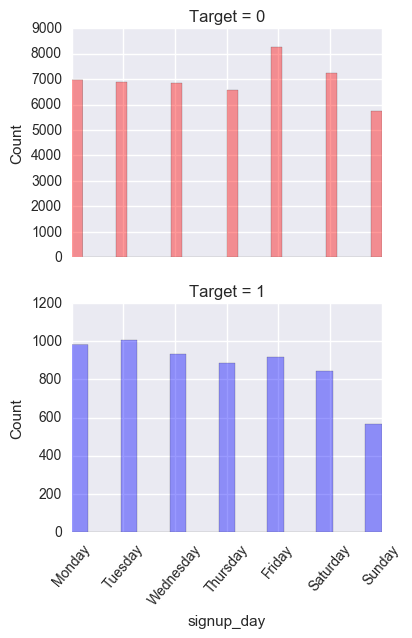

In [353]:
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (4, 6.5) )
sns.distplot(dat.ix[dat.Target == 0, 'signup_day'], color = 'r', kde=False, ax = ax1  )
sns.distplot(dat.ix[dat.Target == 1, 'signup_day'], color = 'b', kde=False, ax = ax2 )
ax1.set_ylabel('Count')
ax1.set_xlabel('')
ax1.set_title('Target = 0')
ax2.set_ylabel('Count')
ax2.set_title('Target = 1')
ax2.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(rotation=50)

The above plot clearly shows that the signup weekday may not be a good predictor of the target variable. So lets delete.

In [354]:
del dat['signup_day']

In [355]:
def time_delta_int(x):
    try:
        return x.days
    except:
        return np.NaN

time_delta_int() function is applied to columns 'days_bgc' and 'days_drive' to convert the data in datetime format (days) into numerical values (days)

In [356]:
dat['days_bgc'] = dat['days_bgc'].apply(time_delta_int)
dat['days_drive'] = dat['days_drive'].apply(time_delta_int)

### Explore 'days_drive' parameter:

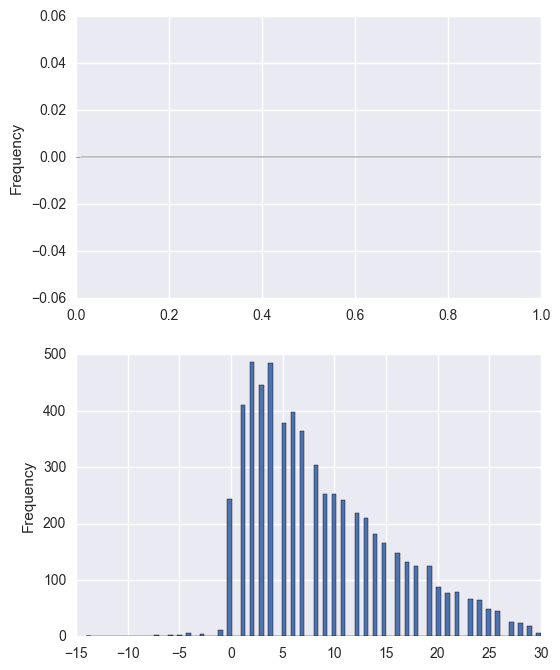

In [357]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (6, 8) )
dat.ix[ dat.Target == 0, 'days_drive'].plot.hist(bins = 100, ax = ax1 )
dat.ix[ dat.Target == 1, 'days_drive'].plot.hist(bins = 100, ax = ax2 )

This could be a good predictor of the target.

In [358]:
dat.ix[ dat.Target == 0, 'days_drive'].unique()

array([ nan])

As expected, the no. of days to drive since bgc is NaN when the target is 0. Data integrity is maintained here. 
To cleanup and for modeling purposes, lets replace all NaNs with -1

In [363]:
dat.ix[dat.Target == 0, 'days_drive'] = dat.ix[dat.Target == 0, 'days_drive'].fillna(-1)
dat.ix[dat.Target == 0, 'days_drive'].head()

0   -1.0
1   -1.0
2   -1.0
4   -1.0
5   -1.0
Name: days_drive, dtype: float64

When the target is 1, the no. of days to drive since bgc has a chi-squared distribution (refer to the previous plot). However, there are some negative values in the data which implies that the driver has started driving even before the bgc approval. The best way to handle this is to just drop them, as they are significantly less. For this case, lets replace all NaNs with 0

Count of missing values in days_drive when the target = 1

In [364]:
dat.ix[ (dat.Target == 1) & (dat.days_drive < 0)].count()

id                33
city_name         33
signup_os         33
signup_channel    33
Target            33
days_bgc          33
days_drive        33
dtype: int64

Drop rows with days_drive as negative and target = 1

In [370]:
index_drop = dat.ix[(dat.Target == 1) & (dat.days_drive < 0)].index.values
dat.drop( dat.index[index_drop], inplace = True )
dat = dat.reset_index(drop = True)

In [371]:
dat.ix[ (dat.Target == 1) & (dat.days_drive < 0)].count()

id                0
city_name         0
signup_os         0
signup_channel    0
Target            0
days_bgc          0
days_drive        0
dtype: int64

Let's plot again to check the data:

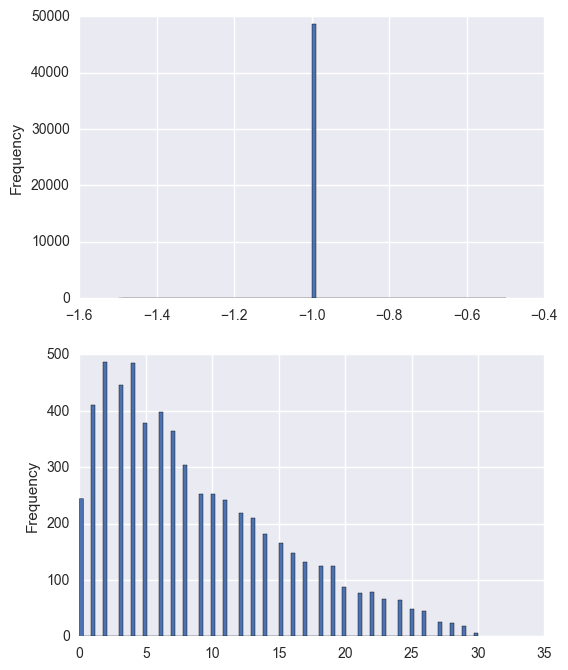

In [373]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (6, 8) )
dat.ix[ dat.Target == 0, 'days_drive'].plot.hist(bins = 100, ax = ax1 )
dat.ix[ dat.Target == 1, 'days_drive'].plot.hist(bins = 100, ax = ax2 )

In [374]:
dat.count() / len(dat)

id                1.000000
city_name         1.000000
signup_os         1.000000
signup_channel    1.000000
Target            1.000000
days_bgc          0.601358
days_drive        1.000000
dtype: float64

In [375]:
# Saving a backup
dat.to_csv("./data/ds_challenge_replaced_days_drive.csv", index = False)

### Explore 'days_bgc' parameter:

In [497]:
# reload data if needed
dat = pd.read_csv("./data/ds_challenge_replaced_days_drive.csv")
try:
    del dat['Unnamed: 0']

Plotting the data for a particular case:

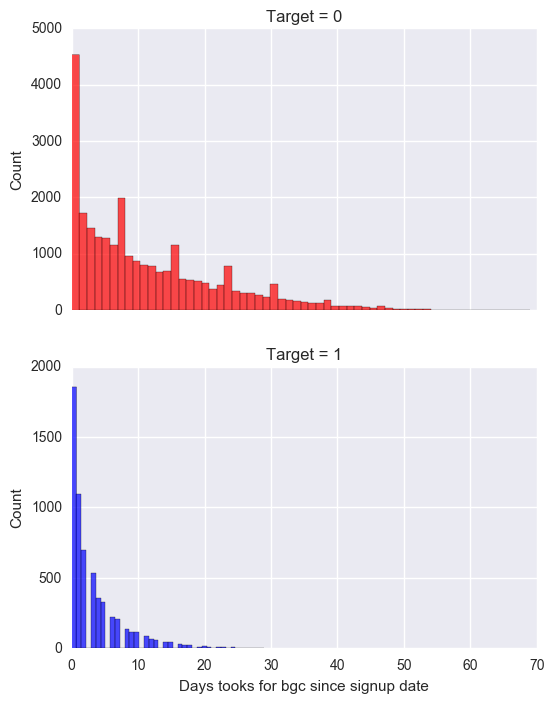

In [498]:
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (6, 8) )
dat.ix[ dat.Target == 0, 'days_bgc'].plot.hist(bins = 60, ax = ax1, color = 'red', alpha = 0.7 )
dat.ix[ dat.Target == 1, 'days_bgc'].plot.hist(bins = 40, ax = ax2, color = 'blue', alpha = 0.7 )
ax1.set_ylabel('Count')
ax1.set_title('Target = 0')
ax2.set_ylabel('Count')
ax2.set_title('Target = 1')
ax2.set_xlabel('Days tooks for bgc since signup date')

From the above plot, it is obvious that as the number of days since the signup increases the probability of getting background check approval (and drive) falls exponentially.

From the training set, if the days_bgc < 25 there is a finite probability, although negligible, that the candidate will give approval for the backgroud check. However, after ~25 days it is highly unlikely to get approval for bgc.

Hence this parameter could be a good predictor of the target

## Data cleaning - 2:

### Clean days_bgc:

Time to replace NaNs in days_bgc columns

In [499]:
dat.count() / len(dat)

Unnamed: 0        1.000000
id                1.000000
city_name         1.000000
signup_os         1.000000
signup_channel    1.000000
Target            1.000000
days_bgc          0.601358
days_drive        1.000000
dtype: float64

Approximately 40% of the data are missing in the days_bgc column

We have significant difference in 'days_bgc' (exponential-decay rate) when target = 0 compared to the other case (refer previous plot). So this would be helpful to replace the NaNs in the dataset more accurately. 

Creating a matrix with mean days_bgc for each group:

In [500]:
days_bgc_freq_table = dat.groupby(['city_name', 'signup_os', 'signup_channel', 'Target'])['days_bgc'].mean().astype(int).reset_index()
print(days_bgc_freq_table.head(10))
print(days_bgc_freq_table.shape)

  city_name    signup_os signup_channel  Target  days_bgc
0    Berton  android web        Organic     0.0        11
1    Berton  android web        Organic     1.0         3
2    Berton  android web           Paid     0.0        11
3    Berton  android web           Paid     1.0         3
4    Berton  android web       Referral     0.0        11
5    Berton  android web       Referral     1.0         3
6    Berton      ios web        Organic     0.0        11
7    Berton      ios web        Organic     1.0         3
8    Berton      ios web           Paid     0.0        11
9    Berton      ios web           Paid     1.0         2
(90, 5)


There are 90 different cases (or groups)

<b> Data exploration through visualization for 8 different cases: </b>

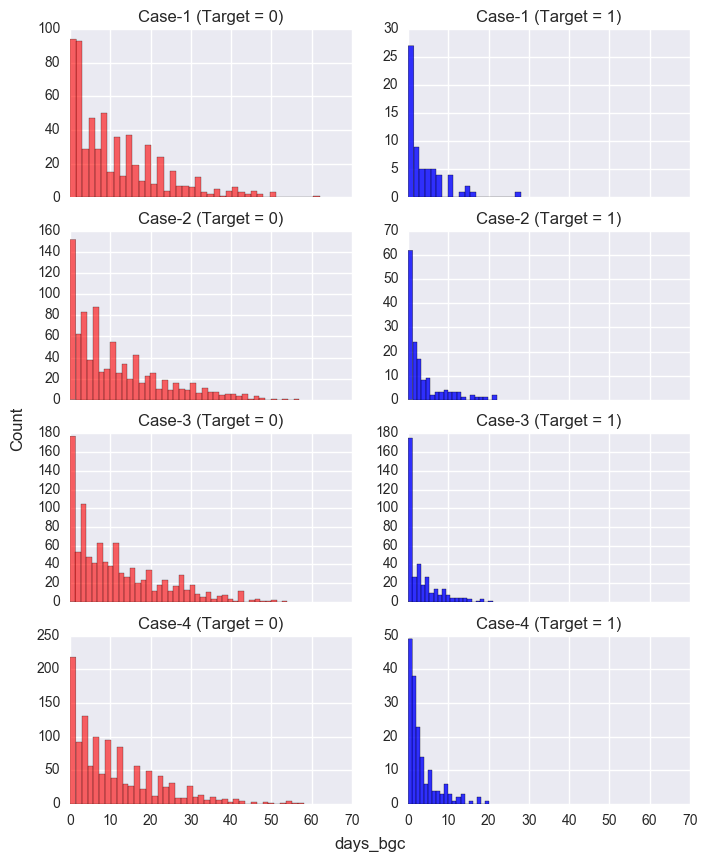

In [199]:
fig, axes = plt.subplots(4, 2, figsize = (8, 10), sharex = True)

params1 = {'color':'red', 'alpha':0.6, 'bins': 40}
params2 = {'color':'blue', 'alpha':0.8, 'bins': 20}

dat.ix[(dat.city_name == 'Berton') & (dat.signup_os == 'android web') & (dat.signup_channel == 'Organic') & (dat.Target == 0), 'days_bgc'].hist(ax = axes[0, 0], **params1)
dat.ix[(dat.city_name == 'Berton') & (dat.signup_os == 'ios web') & (dat.signup_channel == 'Organic') & (dat.Target == 0), 'days_bgc'].hist(ax = axes[1, 0], **params1)
dat.ix[(dat.city_name == 'Berton') & (dat.signup_os == 'android web') & (dat.signup_channel == 'Referral') & (dat.Target == 0), 'days_bgc'].hist(ax = axes[2, 0], **params1)
dat.ix[(dat.city_name == 'Berton') & (dat.signup_os == 'ios web') & (dat.signup_channel == 'Paid') & (dat.Target == 0), 'days_bgc'].hist(ax = axes[3, 0], **params1)

dat.ix[(dat.city_name == 'Berton') & (dat.signup_os == 'android web') & (dat.signup_channel == 'Organic') & (dat.Target == 1), 'days_bgc'].hist(ax = axes[0, 1], **params2)
dat.ix[(dat.city_name == 'Berton') & (dat.signup_os == 'ios web') & (dat.signup_channel == 'Organic') & (dat.Target == 1), 'days_bgc'].hist(ax = axes[1, 1], **params2)
dat.ix[(dat.city_name == 'Berton') & (dat.signup_os == 'android web') & (dat.signup_channel == 'Referral') & (dat.Target == 1), 'days_bgc'].hist(ax = axes[2, 1], **params2)
dat.ix[(dat.city_name == 'Berton') & (dat.signup_os == 'ios web') & (dat.signup_channel == 'Paid') & (dat.Target == 1), 'days_bgc'].hist(ax = axes[3, 1], **params2)

axes[0,0].set_title('Case-1 (Target = 0)')
axes[1,0].set_title('Case-2 (Target = 0)')
axes[2,0].set_title('Case-3 (Target = 0)')
axes[3,0].set_title('Case-4 (Target = 0)')
axes[0,1].set_title('Case-1 (Target = 1)')
axes[1,1].set_title('Case-2 (Target = 1)')
axes[2,1].set_title('Case-3 (Target = 1)')
axes[3,1].set_title('Case-4 (Target = 1)')

fig.text(0.5, 0.08, 'days_bgc', ha='center')
fig.text(0.05, 0.5, 'Count', va='center', rotation='vertical')

plt.show()

From the above set of plots, it is safe to assume that for any case the no. of. partners to give bgc approval drops exponentially as the no. of days increases. However, the exponential-decay rate and constants are different for each case. Therefore, we should not assume a generic model for all the cases.

To go forward, lets find probability distribution function (pdf) for all 90 cases and use them to replace NaNs.

In [501]:
from scipy import stats
from scipy.optimize import curve_fit # to use custom functions for fitting

As the count drop exponentially, lets assume exponential fit and find the parameters for each fit

In [502]:
# Exponential fit function:
def exp_fit(x, a, b, c):
    return a * np.exp(-b * x) + c

<b> Find optimal parameters for the exponential fit (by minimizing least square error): </b>

In [503]:
fit_data = dat.ix[(dat.city_name == 'Berton') & (dat.signup_os == 'android web') 
                     & (dat.signup_channel == 'Organic') & (dat.Target == 0), 'days_bgc'].value_counts()
fit_data = fit_data / fit_data.sum()
fit_data = fit_data.reset_index()

popt, _ = curve_fit(exp_fit, fit_data['index'].values, fit_data['days_bgc'].values)
print("Optimal parameters:", popt)

Optimal parameters: [ 0.0772263   0.09180655  0.00252311]


<b> Visualize the data and the fit: </b>

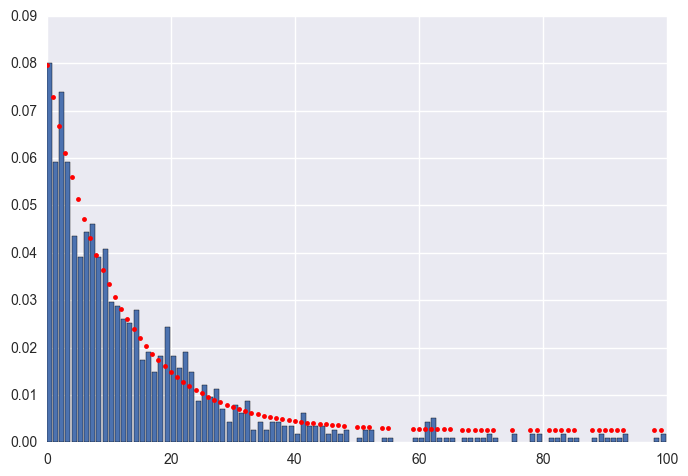

In [505]:
plt.figure()
plt.plot(fit_data_1['index'].values, exp_fit(fit_data_1['index'].values, *popt), 'r.', label="Fitted Curve")
plt.bar(fit_data_1['index'].values, fit_data_1['days_bgc'].values)
plt.show()

In [506]:
# Finds optimal parameters for each of 90 cases and randomly picks 'n' values based on the pdf
def replace_NaN_bgc(df, n):
    fit_data = df.value_counts()
    fit_data = fit_data / fit_data.sum()
    fit_data = fit_data.reset_index()

    popt, _ = curve_fit( exp_fit, fit_data['index'].values, fit_data['days_bgc'].values )
    
    y = [(x, exp_fit(x, *popt)) for x in range(100)]
    days, probs = zip(*y)
    probs = probs / sum(probs) # Normalized to have a sum of 1
    
    return np.random.choice(days, p = probs, size = n)

In [507]:
# Runs in loop and replaces NaN:
for index_, data_  in days_bgc_freq_table.iterrows():
    
    city_ = data_['city_name']; os_ = data_['signup_os']; channel_ = data_['signup_channel']; targ = data_['Target']
    
    condition_null = (dat.city_name == city_) & (dat.signup_os == os_) & (dat.signup_channel == channel_) & \
                     (dat.Target == targ) & dat['days_bgc'].isnull()
    
    condition_notnull = (dat.city_name == city_) & (dat.signup_os == os_) & (dat.signup_channel == channel_) & \
                        (dat.Target == targ) & dat['days_bgc'].notnull()
    
    n_miss = dat[condition_null].shape[0]
    
    if n_miss > 0:
        dat.ix[condition_null, 'days_bgc'] = replace_NaN_bgc( dat.ix[condition_notnull, 'days_bgc'], n_miss )

Data percentage after replacement:

In [508]:
dat.count() / len(dat)

Unnamed: 0        1.0
id                1.0
city_name         1.0
signup_os         1.0
signup_channel    1.0
Target            1.0
days_bgc          1.0
days_drive        1.0
dtype: float64

Lets check the distribution after replacement:

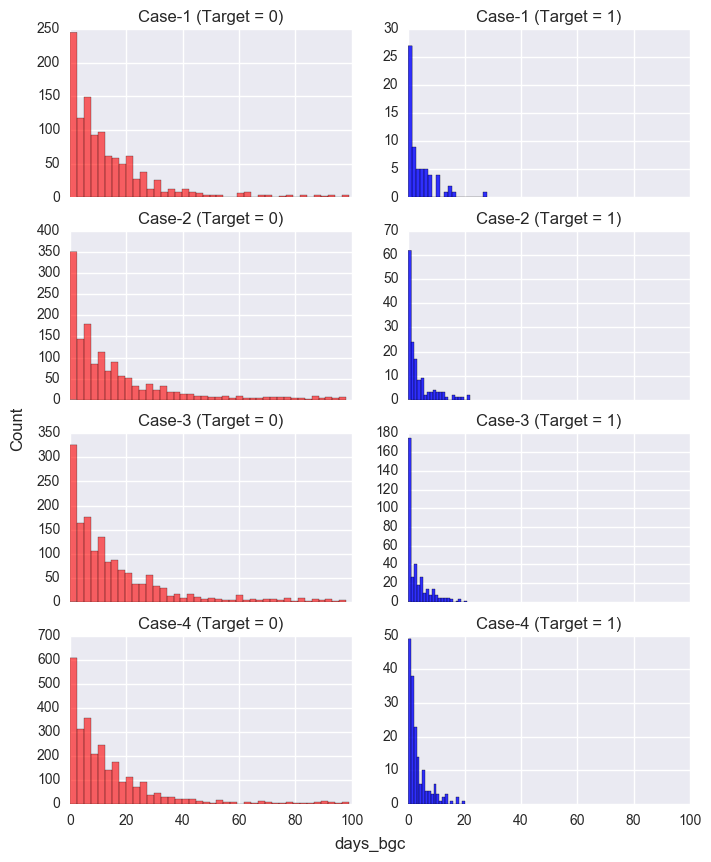

In [381]:
fig, axes = plt.subplots(4, 2, figsize = (8, 10), sharex = True)

params1 = {'color':'red', 'alpha':0.6, 'bins': 40}
params2 = {'color':'blue', 'alpha':0.8, 'bins': 20}

dat.ix[(dat.city_name == 'Berton') & (dat.signup_os == 'android web') & (dat.signup_channel == 'Organic') & (dat.Target == 0), 'days_bgc'].hist(ax = axes[0, 0], **params1)
dat.ix[(dat.city_name == 'Berton') & (dat.signup_os == 'ios web') & (dat.signup_channel == 'Organic') & (dat.Target == 0), 'days_bgc'].hist(ax = axes[1, 0], **params1)
dat.ix[(dat.city_name == 'Berton') & (dat.signup_os == 'android web') & (dat.signup_channel == 'Referral') & (dat.Target == 0), 'days_bgc'].hist(ax = axes[2, 0], **params1)
dat.ix[(dat.city_name == 'Berton') & (dat.signup_os == 'ios web') & (dat.signup_channel == 'Paid') & (dat.Target == 0), 'days_bgc'].hist(ax = axes[3, 0], **params1)

dat.ix[(dat.city_name == 'Berton') & (dat.signup_os == 'android web') & (dat.signup_channel == 'Organic') & (dat.Target == 1), 'days_bgc'].hist(ax = axes[0, 1], **params2)
dat.ix[(dat.city_name == 'Berton') & (dat.signup_os == 'ios web') & (dat.signup_channel == 'Organic') & (dat.Target == 1), 'days_bgc'].hist(ax = axes[1, 1], **params2)
dat.ix[(dat.city_name == 'Berton') & (dat.signup_os == 'android web') & (dat.signup_channel == 'Referral') & (dat.Target == 1), 'days_bgc'].hist(ax = axes[2, 1], **params2)
dat.ix[(dat.city_name == 'Berton') & (dat.signup_os == 'ios web') & (dat.signup_channel == 'Paid') & (dat.Target == 1), 'days_bgc'].hist(ax = axes[3, 1], **params2)

axes[0,0].set_title('Case-1 (Target = 0)')
axes[1,0].set_title('Case-2 (Target = 0)')
axes[2,0].set_title('Case-3 (Target = 0)')
axes[3,0].set_title('Case-4 (Target = 0)')
axes[0,1].set_title('Case-1 (Target = 1)')
axes[1,1].set_title('Case-2 (Target = 1)')
axes[2,1].set_title('Case-3 (Target = 1)')
axes[3,1].set_title('Case-4 (Target = 1)')

fig.text(0.5, 0.08, 'days_bgc', ha='center')
fig.text(0.05, 0.5, 'Count', va='center', rotation='vertical')

plt.show()

So we retain the data distribution for any case as desired and hence we can proceed further to the next step

In [515]:
# Save backup:
dat.to_csv("./data/ds_challenge_clean_all.csv", index = False)

# Predictive modeling

As the data is clean and valid, lets move forward to predictive modeling part.

In [518]:
# Reload data if needed
dat = pd.read_csv("./data/ds_challenge_clean_all.csv")                         

In [520]:
dat.head()

,id,city_name,signup_os,signup_channel,Target,days_bgc,days_drive
0,1,Strark,ios web,Paid,0.0,8.0,-1.0
1,2,Strark,windows,Paid,0.0,30.0,-1.0
2,3,Wrouver,windows,Organic,0.0,0.0,-1.0
3,4,Berton,android web,Referral,1.0,5.0,0.0
4,5,Strark,android web,Referral,0.0,15.0,-1.0


## Data Preparation

### Predictors and Target split:

In [521]:
data_predictors = dat[['city_name', 'signup_os', 'signup_channel', 'days_bgc', 'days_drive']]
data_target = dat[['Target']]

It is mandatory to convert all the string in the dataset to nominal values for easier handling (by algos) in the modeling step

In [522]:
from sklearn import preprocessing as pre
from sklearn.preprocessing import LabelEncoder as LE

### Convert categorical to nominal values:

In [523]:
le_city = LE()
le_os = LE()
le_channel = LE()

In [524]:
data_predictors['city_name'] = le_city.fit_transform(data_predictors['city_name'])
data_predictors['signup_os'] = le_os.fit_transform(data_predictors['signup_os'])
data_predictors['signup_channel'] = le_channel.fit_transform(data_predictors['signup_channel'])

C:\USERS\VENKI_K07\ANACONDA3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\USERS\VENKI_K07\ANACONDA3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\USERS\VENKI_K07\ANACONDA3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [525]:
data_predictors.head()

,city_name,signup_os,signup_channel,days_bgc,days_drive
0,1,1,1,8.0,-1.0
1,1,4,1,30.0,-1.0
2,2,4,0,0.0,-1.0
3,0,0,2,5.0,0.0
4,1,0,2,15.0,-1.0


In [526]:
data_predictors.shape

(54648, 5)

In [529]:
# Save backup:
data_predictors.to_csv("./data/ds_challenge_clean_predictors.csv", index = False)
data_target.to_csv("./data/ds_challenge_clean_target.csv", index = False)

In [518]:
### reload data if needed
data_predictors = pd.read_csv("./data/ds_challenge_clean_predictors.csv")
data_target = pd.read_csv("./data/ds_challenge_clean_target.csv")

In [530]:
data_predictors.head()

,city_name,signup_os,signup_channel,days_bgc,days_drive
0,1,1,1,8.0,-1.0
1,1,4,1,30.0,-1.0
2,2,4,0,0.0,-1.0
3,0,0,2,5.0,0.0
4,1,0,2,15.0,-1.0


### Data sampling techniques:

In [541]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from datetime import datetime as dt

#### Data sampling: 1 (shuffle split)

In [553]:
X_train, X_test, y_train, y_test = train_test_split( data_predictors, data_target, test_size = 0.3, 
                                                     random_state = dt.now().time().microsecond)

#### Data sampling: 2  (strafied shuffle split)

In [554]:
def sampling_stratified_shuffle_split(data_predictors, data_target):
    
    sp = StratifiedShuffleSplit( n_splits = 1, test_size = 0.3, random_state = dt.now().time().microsecond )
    
    for train_index, test_index in sp.split(data_predictors, data_target):
        X_train, X_test = data_predictors.ix[train_index], data_predictors.ix[test_index]
        y_train, y_test = data_target.ix[train_index], data_target.ix[test_index]
        
    return X_train, X_test, y_train, y_test

## MODELING (Machine Learning):

In [412]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

### Model 1: Random Forest (days_drive - included)

In [597]:
# Create an object for Random forest classifier
rfc1 = RandomForestClassifier(n_estimators = 1000, n_jobs= 4)

In [598]:
# Apply stratified sampling method to split train and test data
X_train, X_test, y_train, y_test = sampling_stratified_shuffle_split( data_predictors, data_target )

#### Feature importances

In [599]:
rfc1.fit(X_train, np.ravel(y_train))

importances = rfc1.feature_importances_

indices = np.argsort(importances)[::-1] # Reverse the order based on ranking

for f in range(X_train.shape[1]):
    print( "%s (%f)" % (X_train.columns.values[indices[f]], importances[indices[f]]) )

days_drive (0.945419)
days_bgc (0.038533)
signup_channel (0.014249)
signup_os (0.001396)
city_name (0.000403)


#### Model accuracy

In [600]:
print("Test score:", rfc1.score(X_test, np.ravel(y_test)))

Test score: 1.0


This tells us that the 'days_drive' is the only major predictor. This is because of the NaNs we had in the dataset (all) for 'days_drive' when Target = 0. Since we replaced the NaNs with -1, the model could easy be developed just with this parameter. 

If 'days_drive' < 0 then target = 0

If 'days_drive' > 0 then target = 1

Therefore we should remove this variable from the dataset

### Model 2: Random Forest (days_drive - excluded)

In [575]:
data_predictors2 = data_predictors.copy(deep = True)
del data_predictors2['days_drive']

In [576]:
X_train2, X_test2, y_train2, y_test2 = sampling_stratified_shuffle_split( data_predictors2, data_target )

#### Feature importances

In [578]:
rfc2 = RandomForestClassifier(n_estimators = 1000, n_jobs= 4)

rfc2.fit(X_train2, np.ravel(y_train2))

importances = rfc2.feature_importances_

indices = np.argsort(importances)[::-1] # Reverse the order based on ranking

for f in range(X_train2.shape[1]):
    print( "%s (%f)" % (X_train2.columns.values[indices[f]], importances[indices[f]]) )

days_bgc (0.640059)
signup_channel (0.220868)
signup_os (0.088730)
city_name (0.050342)


#### Model accuracy

In [579]:
print("Test score:", rfc2.score(X_test2, np.ravel(y_test2)))

Test score: 0.888319609637


### Model 3: Random Forest (days_drive and days_bgc - excluded)

In [580]:
data_predictors3 = data_predictors.copy(deep = True)
data_predictors3.drop(['days_drive', 'days_bgc'], axis = 1, inplace = True)

In [581]:
X_train3, X_test3, y_train3, y_test3 = sampling_stratified_shuffle_split( data_predictors3, data_target )

#### Feature importances

In [582]:
rfc3 = RandomForestClassifier(n_estimators = 1000, n_jobs= 4)

rfc3.fit(X_train3, np.ravel(y_train3))

importances = rfc3.feature_importances_

indices = np.argsort(importances)[::-1] # Reverse the order based on ranking

for f in range(X_train3.shape[1]):
    print( "%s (%f)" % (X_train3.columns.values[indices[f]], importances[indices[f]]) )

signup_channel (0.820642)
signup_os (0.132115)
city_name (0.047243)


#### Model accuracy

In [583]:
print("Test score:", rfc3.score(X_test3, np.ravel(y_test3)))

Test score: 0.888319609637


### Model 4: Random Forest (days_drive, days_bgc, and city_name - excluded)

In [584]:
data_predictors4 = data_predictors.copy(deep = True)
data_predictors4.drop(['days_drive', 'days_bgc', 'city_name'], axis = 1, inplace = True)

In [585]:
X_train4, X_test4, y_train4, y_test4 = sampling_stratified_shuffle_split( data_predictors4, data_target )

#### Feature importances

In [586]:
rfc4 = RandomForestClassifier(n_estimators = 1000, n_jobs= 4)

rfc4.fit(X_train4, np.ravel(y_train4))

importances = rfc4.feature_importances_

indices = np.argsort(importances)[::-1] # Reverse the order based on ranking

for f in range(X_train4.shape[1]):
    print( "%s (%f)" % (X_train4.columns.values[indices[f]], importances[indices[f]]) )

signup_channel (0.866644)
signup_os (0.133356)


#### Model accuracy

In [587]:
print("Test score:", rfc4.score(X_test4, np.ravel(y_test4)))

Test score: 0.888319609637


## Modeling Validation: AUC

In [592]:
# Function to return receiver-operator characteristics ( false positive rate, true positive rate, and area under the curve)
def get_ROC(model, x, y):    
    fpr, tpr, _ = roc_curve(y, model.predict_proba(x)[:,1])
    return fpr, tpr, auc(fpr, tpr)

In [593]:
# Plot receiver-operator characteristics (ROC) curve:
def plot_AUC(x_trains, y_trains, models, labels):

    plt.figure()
    for x_train, y_train, model, label in zip(x_trains, y_trains, models, labels):

        fpr, tpr, auc_ = get_ROC(model, x_train, y_train)

        plt.plot(fpr, tpr, label ='%s (Area = %0.4f)' %(label, auc_))
        plt.plot([0,1],[0,1],'k--')
        
        plt.title('ROC Curve')
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.legend(loc = "lower right")
        
    plt.show()

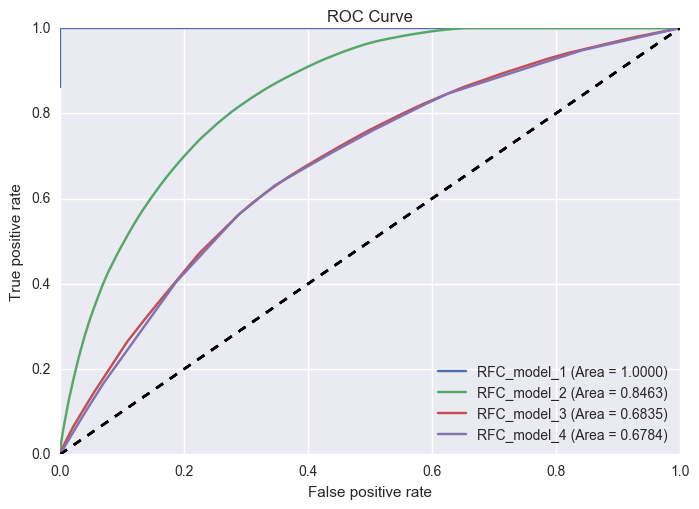

In [602]:
plot_AUC( [X_train, X_train2, X_train3, X_train4], [y_train, y_train2, y_train3, y_train4], 
          [rfc1, rfc2, rfc3, rfc4], ['RFC_model_1', 'RFC_model_2', 'RFC_model_3', 'RFC_model_4'] )

The model with highest AUC (area under the curve) represents the most reliable model. In the above plot, after skipping RFC_model_1, the most reliable model is RFC_model_2 with days_bgc, signup_channel, signup_os, and city_name.  

## Hyperparameter Optimization:

### Model 5: Random Forest with parameter optimization

In [609]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [603]:
data_predictors5 = data_predictors.copy(deep = True)
data_predictors5.drop(['days_drive'], axis = 1, inplace = True)

In [604]:
X_train5, X_test5, y_train5, y_test5 = sampling_stratified_shuffle_split( data_predictors5, data_target )

<b> Apply Gridsearch method for finding the optimal parameter from the list: </b>

In [630]:
rfc5 = RandomForestClassifier(n_estimators = 1000)
param_grid_all = {"max_features": [2, 3, 4]}

crv = cv.KFold(len(X_train5), n_folds = 5, shuffle = True, random_state = dt.now().time().microsecond )

classifier = GridSearchCV(estimator = rfc5, cv = crv, param_grid = param_grid_all, n_jobs= 4)  
classifier.fit(X_train5, np.ravel(y_train5))

GridSearchCV(cv=sklearn.cross_validation.KFold(n=38253, n_folds=5, shuffle=True, random_state=769787),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_features': [2, 3, 4]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

#### Model accuracy

In [631]:
print("Test score:", classifier.score(X_test5, np.ravel(y_test5)))

Test score: 0.886794754498


#### Optimal parameters

In [635]:
classifier.best_params_

{'max_features': 4}

#### Cross-validation results

In [638]:
classifier.cv_results_

{'mean_fit_time': array([  7.77381754,   8.95802813,  10.35651002]),
 'mean_score_time': array([ 0.8608572,  0.8500463,  0.8135725]),
 'mean_test_score': array([ 0.88874075,  0.88863619,  0.8888976 ]),
 'mean_train_score': array([ 0.89173398,  0.89173398,  0.89173398]),
 'param_max_features': masked_array(data = [2 3 4],
              mask = [False False False],
        fill_value = ?),
 'params': ({'max_features': 2}, {'max_features': 3}, {'max_features': 4}),
 'rank_test_score': array([2, 3, 1]),
 'split0_test_score': array([ 0.88981832,  0.89047183,  0.89021043]),
 'split0_train_score': array([ 0.89124894,  0.89124894,  0.89124894]),
 'split1_test_score': array([ 0.88955692,  0.88994903,  0.88916482]),
 'split1_train_score': array([ 0.89157571,  0.89157571,  0.89157571]),
 'split2_test_score': array([ 0.89034113,  0.88942622,  0.89034113]),
 'split2_train_score': array([ 0.89151036,  0.89151036,  0.89151036]),
 'split3_test_score': array([ 0.88601307,  0.8854902 ,  0.88653595]),
 's

#### Grid scores

In [633]:
classifier.grid_scores_

C:\USERS\VENKI_K07\ANACONDA3\lib\site-packages\sklearn\model_selection\_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.88874, std: 0.00158, params: {'max_features': 2},
 mean: 0.88864, std: 0.00180, params: {'max_features': 3},
 mean: 0.88890, std: 0.00141, params: {'max_features': 4}]

#### ROC curve

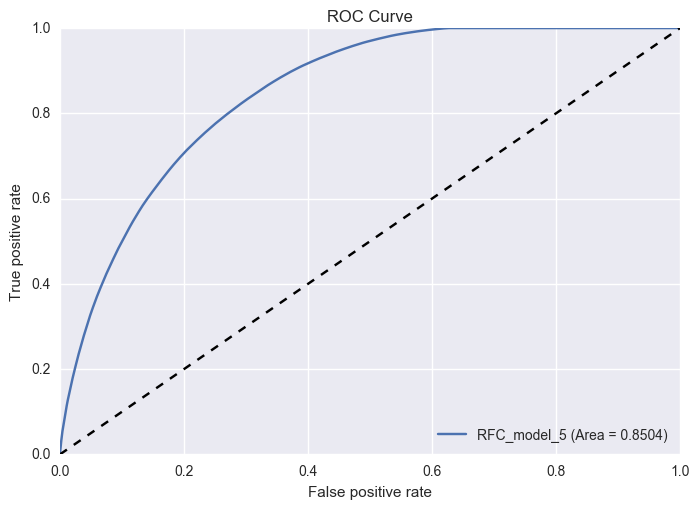

In [634]:
plot_AUC( [X_train5], [y_train5], [classifier], ['RFC_model_5'] )

### Model 6: Logistic regression

In [639]:
from sklearn.linear_model import LogisticRegression

In [641]:
data_predictors6 = data_predictors.copy(deep = True)
data_predictors6.drop(['days_drive'], axis = 1, inplace = True)

In [642]:
X_train6, X_test6, y_train6, y_test6 = sampling_stratified_shuffle_split( data_predictors6, data_target )

In [648]:
lr = LogisticRegression( C = 0.5, penalty = 'l2', random_state = dt.now().time().microsecond )
lr.fit(X_train6, np.ravel(y_train6))

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=256104, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

#### Model accuracy

In [650]:
print("Test score:", lr.score(X_test6, np.ravel(y_test6)))

Test score: 0.888319609637


#### ROC curve

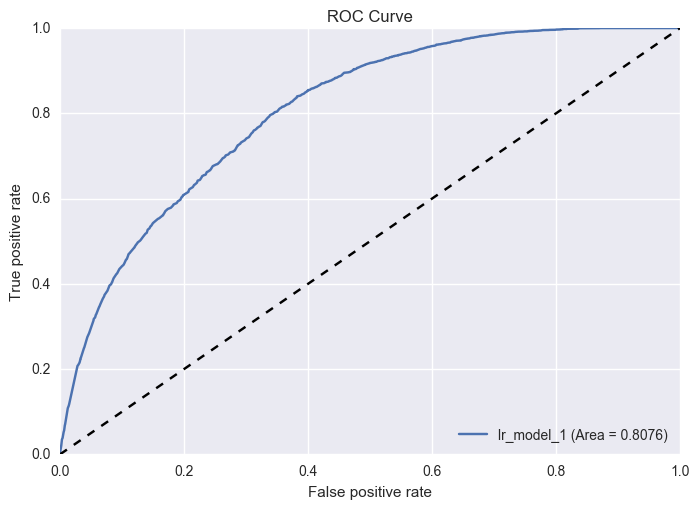

In [652]:
plot_AUC( [X_train6], [y_train6], [lr], ['lr_model_1'] )

## Model Validation: Combining all the models

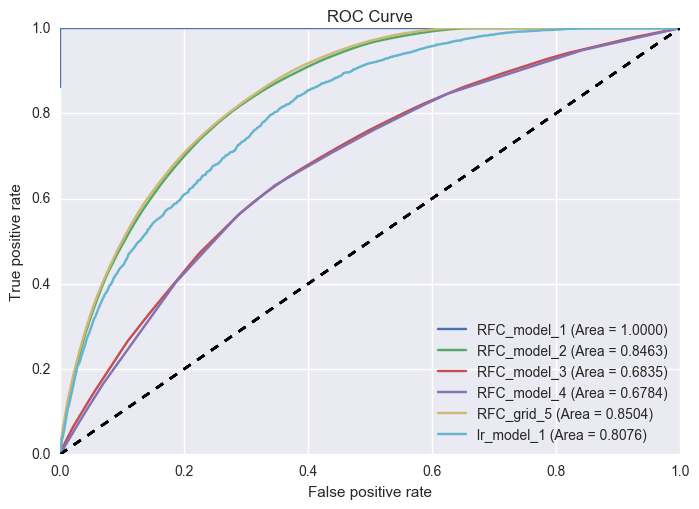

In [654]:
plot_AUC( [X_train, X_train2, X_train3, X_train4, X_train5, X_train6], 
          [y_train, y_train2, y_train3, y_train4, y_train5, y_train6], 
          [rfc1, rfc2, rfc3, rfc4, classifier, lr], 
          ['RFC_model_1', 'RFC_model_2', 'RFC_model_3', 'RFC_model_4', 'RFC_grid_5', 'lr_model_1'] )

<b> From the above 6 models, the most reliable models are RFC_model_2 and RFC_model_5 (both has same parameters) </b>

# Conclusion:

The best classifier is the Random Forest classifier with crossvalidation (gridsearch model - hyperparameter optimization).

The most important parameters for modeling are days_bgc, signup_channel, signup_os, and city_name.

The RFC model is 89% accurate for prediction